# Study Case verification

In this notebook, we verify the model against real world cases. In this manner, we will compare results from our model to field data, and field derived results, as well as compare the model with different modelling approaches

## Verification 1. Garne Site - Colombia



### Inputs

In [1]:
H = 25 # Aquifer Height
Q = 1.2 #Pumping rate L/s
d = 30 #Distance from the river
k = 2.3e-5 #K m/s
poro = 0.3
h0 = 24 #River head


## Create Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import model_proposal #AEM model location
import solvers #Solvers for some analysis from the aem model

# Define model with hydraulic condutivity = 3 m/d, height = 20, reference river head = 18

aem_model = model_proposal.Model(k = k*3600*24, H = H, h0 = h0)

aem_model.Qo_x = -0.5

# Add well at position x = d, y = 50 and pumping rate of 1.2 L/s, well radius = 0.1

well = model_proposal.Well(aem_model, Q = Q*1e-3*3600*24, rw = 0.1, x = d, y = 50)

# Solver for river length and river water capture fraction.

solv = solvers.river_length(aem_model)

print("River Capture Length, Capture position and contribution to discharge is:")
print(solv.solve_river_length())

length, riv_coords, capture_fraction = solv.solve_river_length()

tt = solv.time_travel(poro, calculate_trajectory = True)

River Capture Length, Capture position and contribution to discharge is:
(65.73103193993305, [17.134484030033477, 82.86551596996652], 0.21200819795420453)


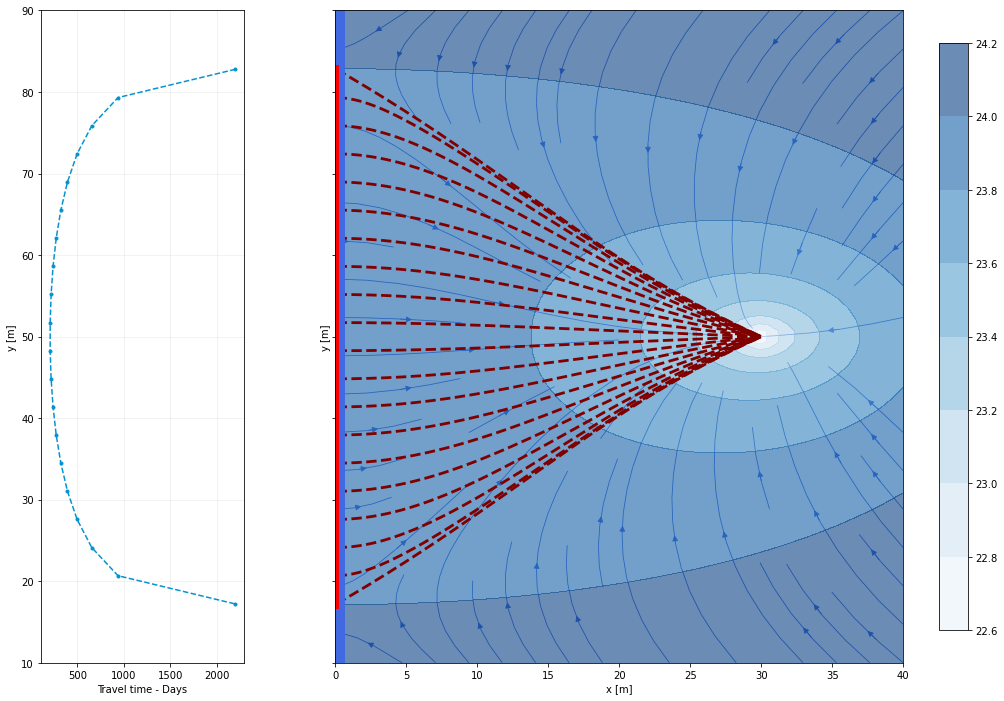

In [3]:
import plot

img = plot.plotting(0,40,10,90,60, riv_coords)

img.plot2d(aem_model, tt=tt[0],ys = tt[1], traj_array = tt[4] ,levels=8, quiver=False, streams=True)

plt.savefig('case_study0.png', dpi = 400)

## Step 2. Compare results

In [4]:
#Portion of River Filtrate (from the paper)
# 10 - 24 %


![Results Published for River Filtrate Portion](pictures_notebook/table_filtrate.png)

In [5]:
print("River Capture Length, Capture position and contribution to discharge is:")
print(solv.solve_river_length())

River Capture Length, Capture position and contribution to discharge is:
(65.73103193993305, [17.134484030033477, 82.86551596996652], 0.21200819795420453)


***River capture water has similar values to the Chloride balance results from Jaramillo, 2015***

The work of Rogger, 2011, used different parameters to compute travel time from pumping rates. Here we apply the used parameter in that work to compare their result, which was derived from MODFLOW, to our result from our RBF model.

In [14]:
# Define Initial model with hydraulic condutivity = 8.6 m/d



lengths = []
cap_fracs = []
tts = []

for q in [8,10,12,15,20,25]:
    
    aem_model = model_proposal.Model(k = 8.6, H = H, h0 = h0)

    # Value adjusted to derive a coherent model:
    aem_model.Qo_x = -7

    well = model_proposal.Well(aem_model, Q = q*1e-3*3600*24, rw = 0.1, x = 30, y = 50)

    # Solver for river length and river water capture fraction.

    solv = solvers.river_length(aem_model)
    try:
        length, riv_coords, capture_fraction = solv.solve_river_length()
        print(solv.solve_river_length())
        dist_est = length/5
        tt, ys, avgtt, mintt = solv.time_travel(poro, delta_s = 0.1,min_dist_est = dist_est)
        
    except:
        length = np.inf
        capture_fraction = 100
        #mintt = np.nan
    
    lengths.append(length)
    cap_fracs.append(capture_fraction)
    tts.append(mintt)

(13.103408496746908, [43.448295751626546, 56.551704248373454], 0.004179979224497906)
(33.38598722204833, [33.307006388975836, 66.69299361102416], 0.05276736509503805)
(45.360213528475924, [27.319893235762038, 72.68010676423796], 0.10585311712719665)
(58.92313819024036, [20.538430904879824, 79.46156909512018], 0.17597780618291486)
(76.34951398392494, [11.825243008037532, 88.17475699196247], 0.26668738789370133)
(90.47961293560519, [4.760193532197398, 95.2398064678026], 0.33400499028708264)


In [16]:
hk = pd.DataFrame()
hk['minimum travel time'] = tts
hk['well pumping rate'] = [8,10,12,15,20, 25]

In [17]:
hk

,minimum travel time,well pumping rate
0,167.551012,8
1,45.770783,10
2,27.920760,12
3,17.769957,15
4,11.057497,20
5,7.985775,25


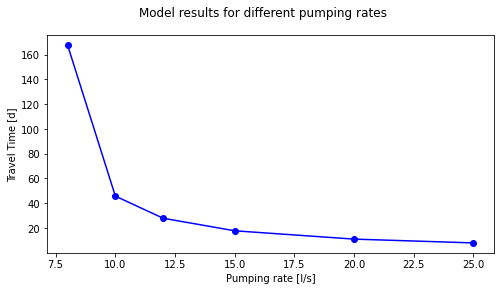

In [20]:
fig, axs = plt.subplots(1,1,sharex = True, figsize = (8,4))

axs.plot(hk['well pumping rate'],hk['minimum travel time'], 'bo-')
axs.set_ylabel('Travel Time [d]')
axs.set_xlabel("Pumping rate [l/s]")
fig.suptitle("Model results for different pumping rates")
plt.savefig("model_guarne_well_pump_river.png", dpi = 400)

Now we can compare with the values from Rogger, 2011:

![Published Values for Travel Time](rogger_tt.png)

As we can see, the values are not the same, however they are similar. The shape of the curve is also similar. Unfortunately the exact values for the work of Rogger, 2011, are not available, and we have to keep with the values from the graph above.

## Verification 2. Garne Site - Colombia



### Inputs

In [1]:
H = 25 # Aquifer Height
Q = 1.2 #Pumping rate L/s
d = 30 #Distance from the river
k = 2.3e-5 #K m/s
poro = 0.3
h0 = 24 #River head


## Create Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import model_proposal #AEM model location
import solvers #Solvers for some analysis from the aem model

# Define model with hydraulic condutivity = 3 m/d, height = 20, reference river head = 18

aem_model = model_proposal.Model(k = k*3600*24, H = H, h0 = h0)

aem_model.Qo_x = -0.5

# Add well at position x = d, y = 50 and pumping rate of 1.2 L/s, well radius = 0.1

well = model_proposal.Well(aem_model, Q = Q*1e-3*3600*24, rw = 0.1, x = d, y = 50)

# Solver for river length and river water capture fraction.

solv = solvers.river_length(aem_model)

print("River Capture Length, Capture position and contribution to discharge is:")
print(solv.solve_river_length())

length, riv_coords, capture_fraction = solv.solve_river_length()

tt = solv.time_travel(poro, calculate_trajectory = True)

River Capture Length, Capture position and contribution to discharge is:
(65.73103193993305, [17.134484030033477, 82.86551596996652], 0.21200819795420453)


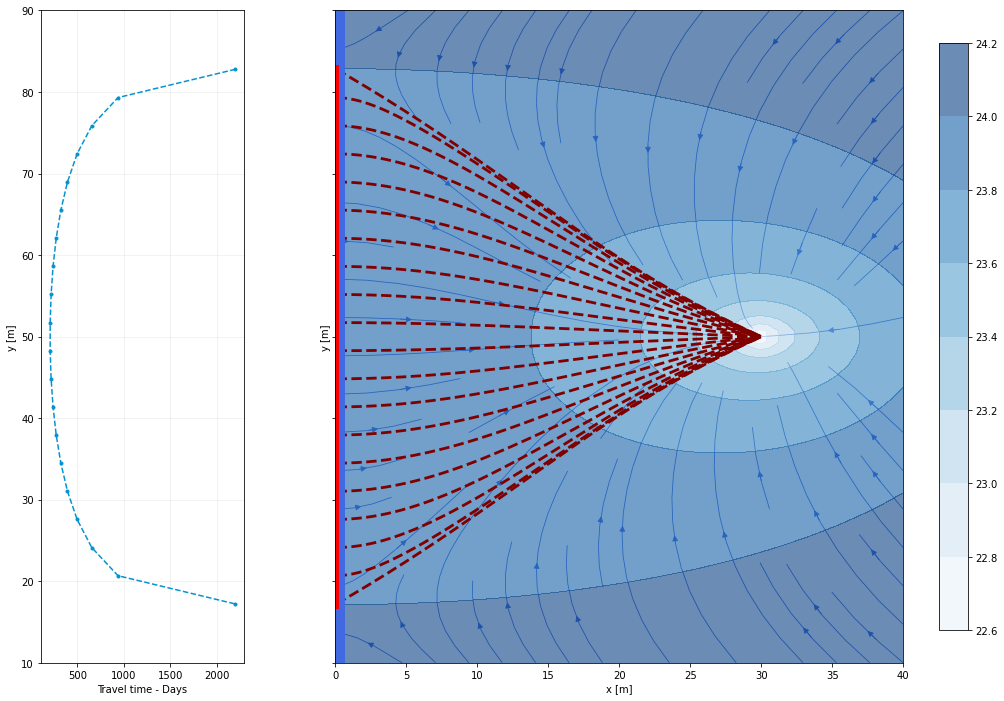

In [3]:
import plot

img = plot.plotting(0,40,10,90,60, riv_coords)

img.plot2d(aem_model, tt=tt[0],ys = tt[1], traj_array = tt[4] ,levels=8, quiver=False, streams=True)

plt.savefig('case_study0.png', dpi = 400)

## Step 2. Compare results

In [4]:
#Portion of River Filtrate (from the paper)
# 10 - 24 %


![Results Published for River Filtrate Portion](table_filtrate.png)

In [5]:
print("River Capture Length, Capture position and contribution to discharge is:")
print(solv.solve_river_length())

River Capture Length, Capture position and contribution to discharge is:
(65.73103193993305, [17.134484030033477, 82.86551596996652], 0.21200819795420453)


***River capture water has similar values to the Chloride balance results from Jaramillo, 2015***

The work of Rogger, 2011, used different parameters to compute travel time from pumping rates. Here we apply the used parameter in that work to compare their result, which was derived from MODFLOW, to our result from our RBF model.

In [14]:
# Define Initial model with hydraulic condutivity = 8.6 m/d



lengths = []
cap_fracs = []
tts = []

for q in [8,10,12,15,20,25]:
    
    aem_model = model_proposal.Model(k = 8.6, H = H, h0 = h0)

    # Value adjusted to derive a coherent model:
    aem_model.Qo_x = -7

    well = model_proposal.Well(aem_model, Q = q*1e-3*3600*24, rw = 0.1, x = 30, y = 50)

    # Solver for river length and river water capture fraction.

    solv = solvers.river_length(aem_model)
    try:
        length, riv_coords, capture_fraction = solv.solve_river_length()
        print(solv.solve_river_length())
        dist_est = length/5
        tt, ys, avgtt, mintt = solv.time_travel(poro, delta_s = 0.1,min_dist_est = dist_est)
        
    except:
        length = np.inf
        capture_fraction = 100
        #mintt = np.nan
    
    lengths.append(length)
    cap_fracs.append(capture_fraction)
    tts.append(mintt)

(13.103408496746908, [43.448295751626546, 56.551704248373454], 0.004179979224497906)
(33.38598722204833, [33.307006388975836, 66.69299361102416], 0.05276736509503805)
(45.360213528475924, [27.319893235762038, 72.68010676423796], 0.10585311712719665)
(58.92313819024036, [20.538430904879824, 79.46156909512018], 0.17597780618291486)
(76.34951398392494, [11.825243008037532, 88.17475699196247], 0.26668738789370133)
(90.47961293560519, [4.760193532197398, 95.2398064678026], 0.33400499028708264)


In [16]:
hk = pd.DataFrame()
hk['minimum travel time'] = tts
hk['well pumping rate'] = [8,10,12,15,20, 25]

In [17]:
hk

,minimum travel time,well pumping rate
0,167.551012,8
1,45.770783,10
2,27.920760,12
3,17.769957,15
4,11.057497,20
5,7.985775,25


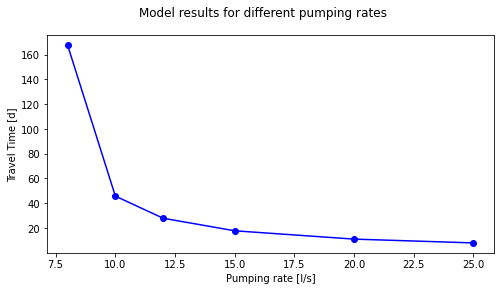

In [20]:
fig, axs = plt.subplots(1,1,sharex = True, figsize = (8,4))

axs.plot(hk['well pumping rate'],hk['minimum travel time'], 'bo-')
axs.set_ylabel('Travel Time [d]')
axs.set_xlabel("Pumping rate [l/s]")
fig.suptitle("Model results for different pumping rates")
plt.savefig("model_guarne_well_pump_river.png", dpi = 400)

Now we can compare with the values from Rogger, 2011:

![Published Values for Travel Time](rogger_tt.png)

As we can see, the values are not the same, however they are similar. The shape of the curve is also similar. Unfortunately the exact values for the work of Rogger, 2011, are not available, and we have to keep with the values from the graph above.